<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [6]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [7]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


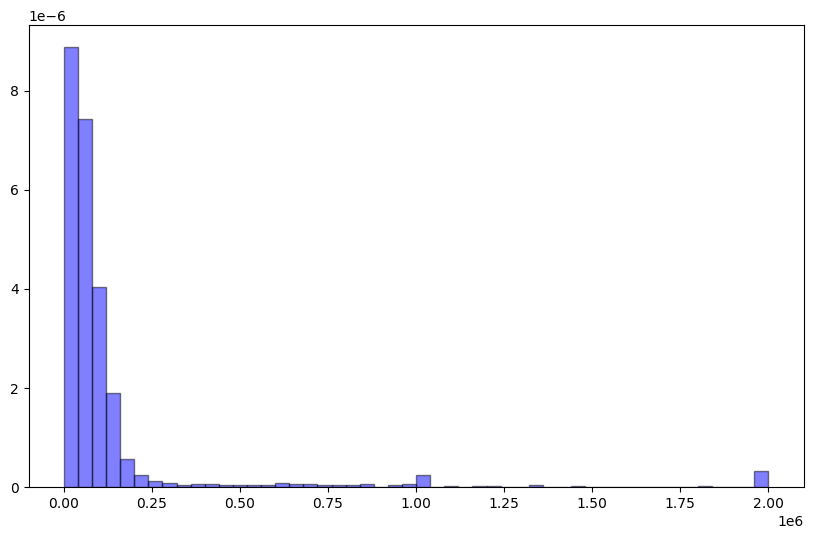

<class 'NameError'>: name 'np' is not defined

In [11]:
# your code goes here
data = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, alpha=0.5, color='blue', edgecolor='black', density=True)

# Compute and plot the KDE curve using numpy
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, kde(x), color='red', label='KDE')

plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.legend()
plt.show()

Plot the histogram for the column `ConvertedComp`.


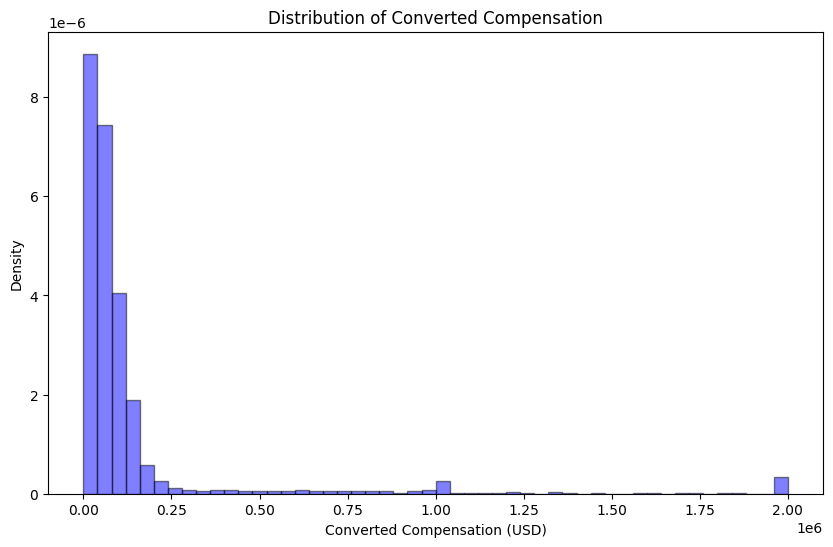

In [12]:
# your code goes here
import matplotlib.pyplot as plt
data = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, alpha=0.5, color='blue', edgecolor='black', density=True)

plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [14]:
# your code goes here
print(df[df['Gender'] == 'Man'].shape[0])

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
woman_responders = df[df['Gender'] == 'Woman']
print(woman_responders['ConvertedComp'].median())

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
five_number_summary = {
    "min": age_summary['min'],
    "q1": age_summary['25%'],
    "q2": age_summary['50%'],
    "q3": age_summary['75%'],
    "max": age_summary['max']
}


In [16]:
# your code goes here
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])
five_number_summary = {
    "min": age_summary['min'],
    "q1": age_summary['25%'],
    "q2": age_summary['50%'],
    "q3": age_summary['75%'],
    "max": age_summary['max']
}
for key, value in five_number_summary.items():
    print(f"{key}: {value}")

min: 16.0
q1: 25.0
q2: 29.0
q3: 35.0
max: 99.0


Plot a histogram of the column `Age`.


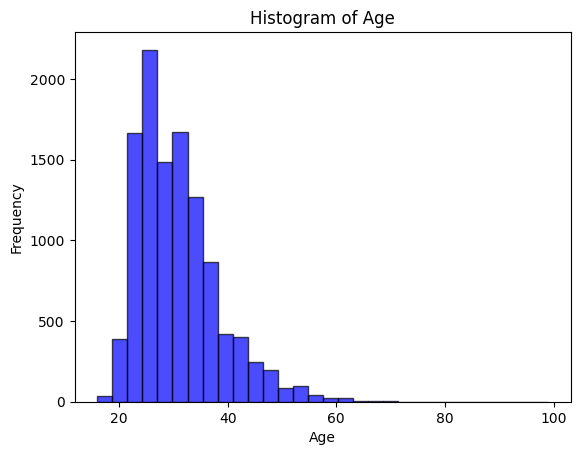

In [17]:
# your code goes here
plt.hist(df['Age'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


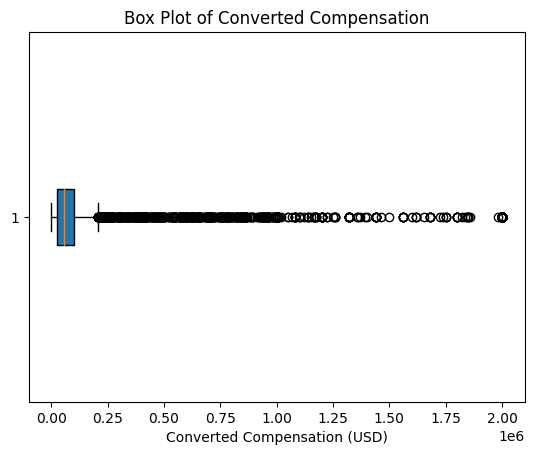

In [18]:
# your code goes here
plt.boxplot(df['ConvertedComp'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("The lower bound for outliers is:", lower_bound)
print("The upper bound for outliers is:", upper_bound)

The lower bound for outliers is: -82830.0
The upper bound for outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
outliers = data[(data < lower_bound) | (data > upper_bound)]


num_outliers = outliers.shape[0]

print("The number of outliers in the 'ConvertedComp' column is:", num_outliers)

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

filtered_df.shape[0]

9703

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
# your code goes here
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()
print(correlation_matrix['Age'])

Respondent      0.004041
MainBranch           NaN
Hobbyist             NaN
OpenSourcer          NaN
OpenSource           NaN
                  ...   
Sexuality            NaN
Ethnicity            NaN
Dependents           NaN
SurveyLength         NaN
SurveyEase           NaN
Name: Age, Length: 85, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
